<a href="https://colab.research.google.com/github/Kush-Singh-26/Micrograd/blob/main/MicroGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def f(x):
  return 3*x**2 + 4*x - 5

In [4]:
f(4.0)

59.0

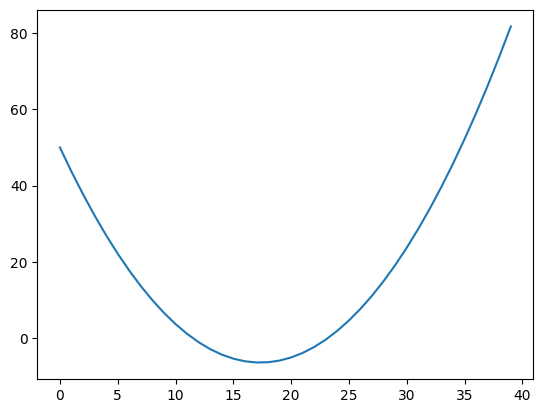

In [5]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(ys)

In [6]:
h = 0.0000001
x = 4
slope = (f(x+h) - f(x)) / h

In [7]:
slope

28.000000469319275

In [48]:
class Tensor:
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f"Tensor(data={self.data})"

  def __add__(self, other):
    out = Tensor(self.data + other.data, (self, other), '+')
    return out

  def __mul__(self, other):
    out = Tensor(self.data * other.data, (self, other), '*')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Tensor(t, (self, ), 'tanh')
    return out



- `_children()` is used to store the bodes that were used to compute this `Tensor` instance
- It is converted to a set and strored in `_prev` attribute
- `label` is added just for the graph not needed in the actual model



$$ tanh(x) = \frac{e^{2x}-1}{e^{2x}+1} $$

In [9]:
a = Tensor(2.0, label='a')
b = Tensor(-3.0, label='b')
c = Tensor(10.0, label='c')
e = a*b
e.label = 'e'
d = e +c
d.label = 'd'
f = Tensor(-2.0, label = 'f')
L = d * f; L.label = 'L'
L

Tensor(data=-8.0)

`a*b + c` = `(a.__mul__(b)).__add__(c)`

In [10]:
d._prev

{Tensor(data=-6.0), Tensor(data=10.0)}

In [11]:
d._op

'+'

In [12]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any Tensor in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this Tensor is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

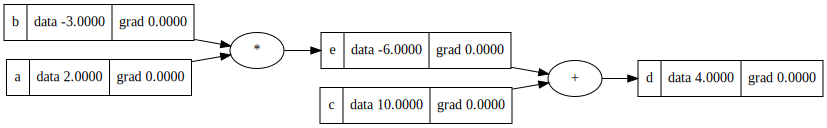

In [13]:
draw_dot(d)

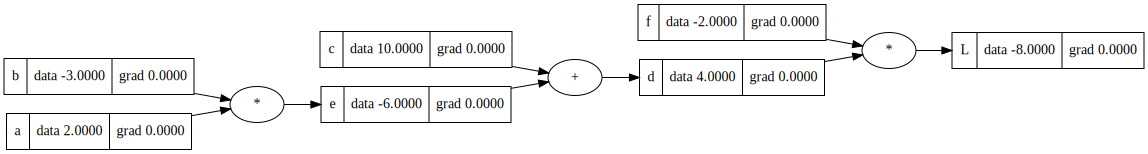

In [14]:
draw_dot(L)

## Manual Backpropdagation
derivative of L with respect to L =  1

In [15]:
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 , label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e +c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data + h       # increased the value of L by h

  print((L2 - L1) / h)

mandef()

1.000000000000334


- Therefore Derivative of L with L = 1

In [16]:
L.grad = 1.0  # manually setting the value of dervative of  with LL

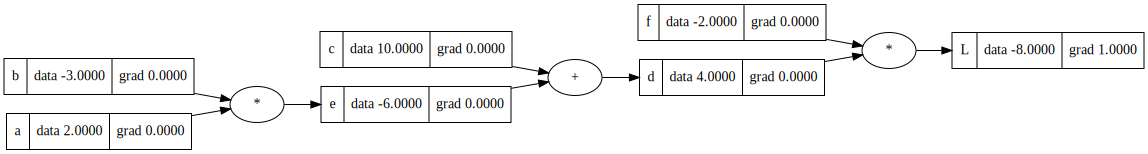

In [17]:
draw_dot(L)

- L = d * f
- derivative of L w.r.t f = dL/df  = d
- by symmetry dL/dd = f

In [18]:
# Derivative of f
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 , label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e +c
  d.label = 'd'
  f = Tensor(-2.0 + h, label = 'f')   # inc value of f
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

mandef()

3.9999999999995595


In [19]:
# Derivative of d
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 , label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e +c
  d.data += h
  d.label = 'd'
  f = Tensor(-2.0 , label = 'f')   # inc value of f
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

mandef()

-2.000000000000668


In [20]:
f.grad = 4.0  # = d
d.grad = -2.0 # = f

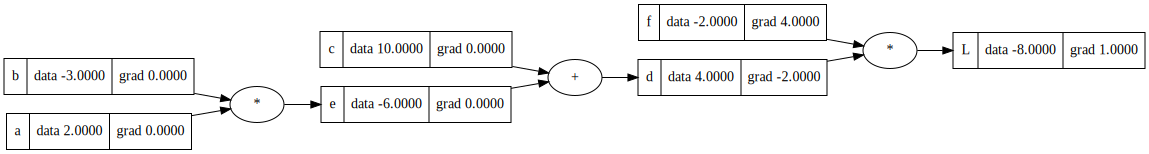

In [21]:
draw_dot(L)

## Derivation of dL/dc

$$ d = c + e $$

Then:

$$ \frac{dd}{dc} = 1, \quad \frac{dd}{de} = 1 $$

By the **chain rule**:

If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y. In this case, the chain rule is expressed as :

$$ \frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx} $$

therfore : <br>
 $$ \frac{dL}{dc} = \frac{dL}{dd} * \frac{dd}{dc} $$   

 <br>
 $$ \frac{dL}{dc} = 1 * (-2.0) $$     <br>
 $$ \frac{dL}{dc} = -2.0 $$

 - Similarly $$ \frac{dL}{de} =  -2.0 $$


In [22]:
c.grad = -2.0
e.grad = -2.0

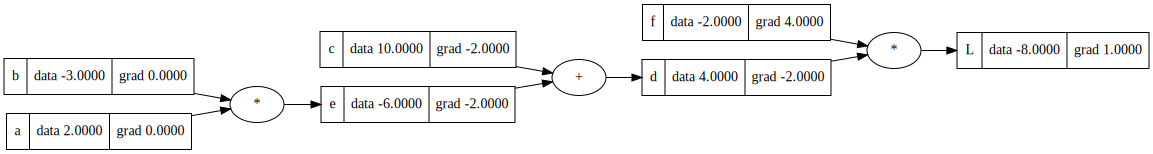

In [23]:
draw_dot(L)

> Thus a `+` node will distribute the derivative to all the children nodes
because derivative of an expression with '+' = 1.

In [24]:
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 , label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.data += h   # inc value of e
  e.label = 'e'
  d = e +c

  d.label = 'd'
  f = Tensor(-2.0 , label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

mandef()

-2.000000000000668


In [25]:
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 , label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0 + h, label='c') # inc value of c
  e = a*b
  e.label = 'e'
  d = e +c

  d.label = 'd'
  f = Tensor(-2.0 , label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

mandef()

-1.9999999999988916


## Derivation of dL/da
from chain rule :

$$ \frac{dL}{da} = \frac{dL}{dd} * \frac{dd}{de} * \frac{de}{da} $$<br>
$$ = \frac{dL}{de} * \frac{de}{da}$$


- e =
  $$ e = a * b $$
$$\frac{de}{da} = b, \quad  \frac{de}{db} = a $$

In [26]:
a.grad = -2.0 * -3.0  # dL/de * b
b.grad = -2.0 * 2.0   # dL/db * a

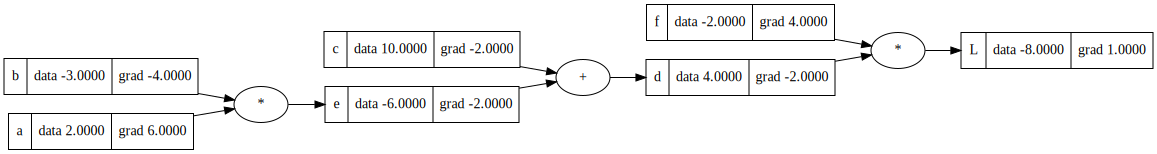

In [27]:
draw_dot(L)

In [28]:
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 + h, label='a') # inc value of a
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e +c

  d.label = 'd'
  f = Tensor(-2.0 , label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

mandef()

6.000000000000227


In [29]:
def mandef():

  h = 0.001

  a = Tensor(2.0, label='a')
  b = Tensor(-3.0, label='b')
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e + c
  d.label = 'd'
  f = Tensor(-2.0, label = 'f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Tensor(2.0 , label='a')
  b = Tensor(-3.0 + h, label='b') # inc value of b
  c = Tensor(10.0, label='c')
  e = a*b
  e.label = 'e'
  d = e +c

  d.label = 'd'
  f = Tensor(-2.0 , label = 'f')
  L = d * f; L.label = 'L'
  L2 = L.data

  print((L2 - L1) / h)

mandef()

-3.9999999999995595


- Single Optimization step

In [30]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


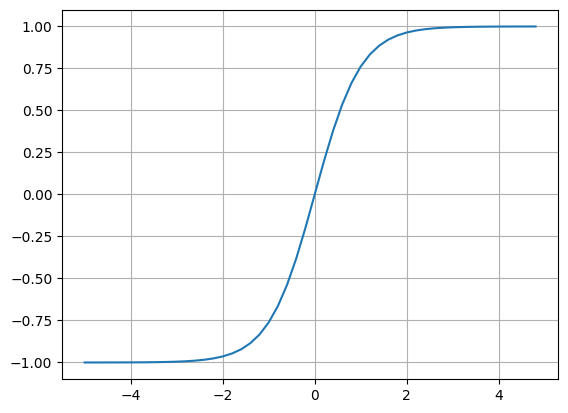

In [36]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [49]:
# inputs x1,x2
x1 = Tensor(2.0, label='x1')
x2 = Tensor(0.0, label='x2')
# weights w1,w2
w1 = Tensor(-3.0, label='w1')
w2 = Tensor(1.0, label='w2')
# bias of the neuron
b = Tensor(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

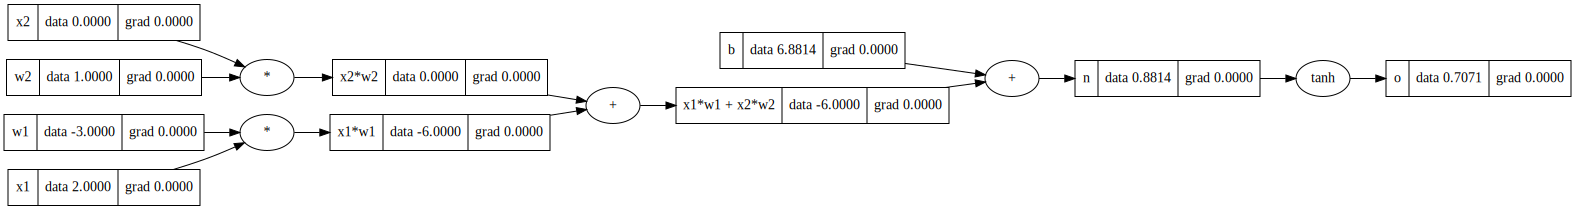

In [50]:
draw_dot(o)

## Backpropagation of the above neuron

In [51]:
o.grad = 1.0

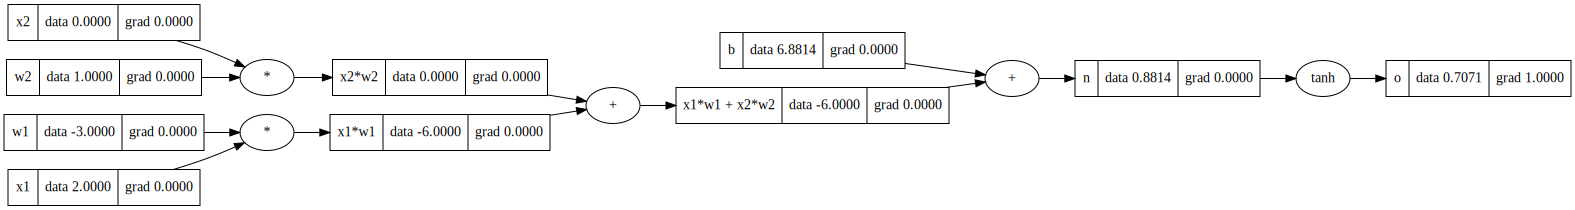

In [52]:
draw_dot(o)

$$ \frac {d}{dx} tanh(x) = 1 - tanh^{2}x $$

In [43]:
o.data

0.999329299739067

In [53]:
1 - o.data**2

0.4999999999999999

In [62]:
n.grad = 0.5

> grad of `+` node will distribute the gradient to the children node

In [63]:
b.grad = 0.5
x1w1x2w2.grad = 0.5

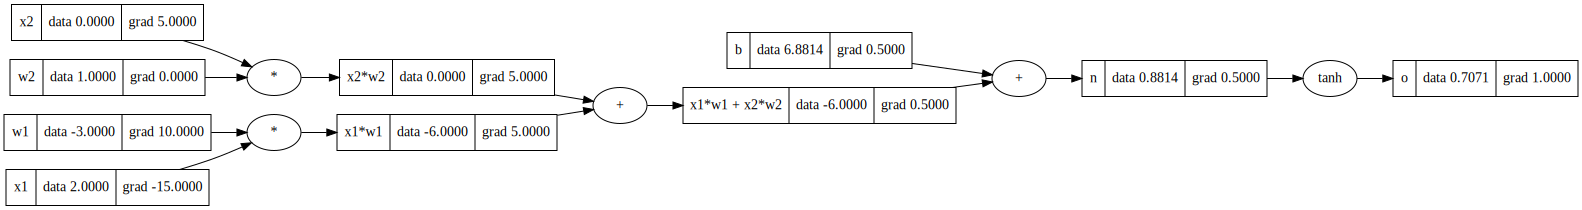

In [64]:
draw_dot(o)

In [65]:
x1w1.grad = 0.5
x2w2.grad = 0.5

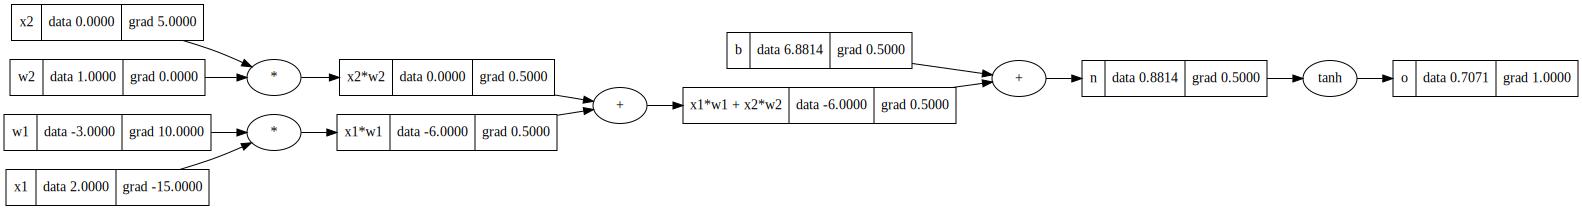

In [66]:
draw_dot(o)

In [67]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [68]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

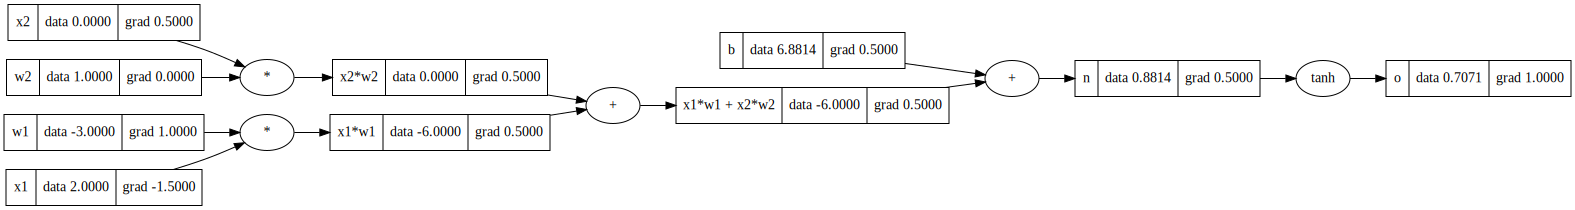

In [69]:
draw_dot(o)